_todo: write your own code to implement the k-means algorithm.  Make plots of the various steps the algorithm takes so you can "see" the algorithm working.  Test your algorithm on either the Iris or PalmerPenguins datasets.  Compare your results to the built-in `kmeans` function in R or Python._

In [29]:
import numpy as np



In [30]:
def initialize_centroids(X, k):
    """
    Randomly initialize k centroids from the dataset X.
    """
    np.random.seed(42)

    # Randomly choose k data points from the dataset as initial centroids
    random_indices = np.random.choice(X.shape[0], size=k, replace=False)

    # Creates array of data points that are the initial centroids
    centroids = X[random_indices, :]
    return centroids

In [31]:
def compute_distances(X, centroids):
    """
    Compute the distance from each point in X to each centroid.
    """
    # Create a matrix of distances between each data point and each centroid
    distances = np.zeros((X.shape[0], len(centroids)))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

In [32]:
def assign_clusters(distances):
    """
    Assign each point to the nearest centroid.
    """
    return np.argmin(distances, axis=1)

In [33]:
def update_centroids(X, labels, k):
    """
    Update the centroids by calculating the mean of the points assigned to each centroid.
    """
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        new_centroids[i, :] = X[labels == i].mean(axis=0)
    return new_centroids

In [34]:
def k_means(X, k, max_iters=100, tol=1e-4):
    """
    The main function to run the k-means algorithm.
    """
    # Step 1: Initialize centroids
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        # Step 2: Compute distances and assign clusters
        distances = compute_distances(X, centroids)
        labels = assign_clusters(distances)
        
        # Step 3: Update centroids
        new_centroids = update_centroids(X, labels, k)
        
        # Step 4: Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    
    return centroids, labels

In [35]:
# load iris dataset
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data

df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Run k-means algorithm

k_means(X, k=3)

(array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0]))

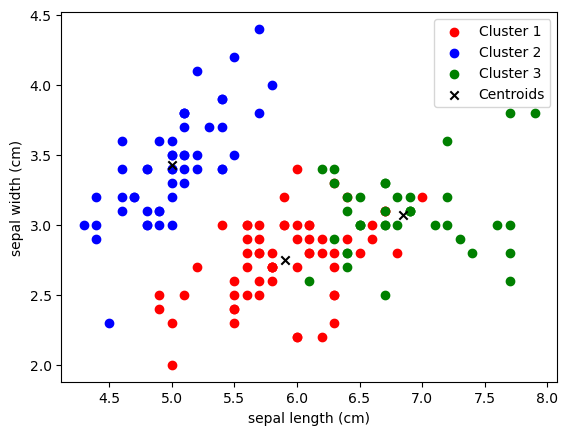

In [36]:
# plot k-means results with centroids and color coded clusters

import matplotlib.pyplot as plt

centroids, labels = k_means(X, k=3)

plt.scatter(X[labels == 0, 0], X[labels == 0, 1], color='red', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], color='blue', label='Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], color='green', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', label='Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

In [37]:
# run k means python function

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

kmeans_centroids = kmeans.cluster_centers_

kmeans_labels = kmeans.labels_

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


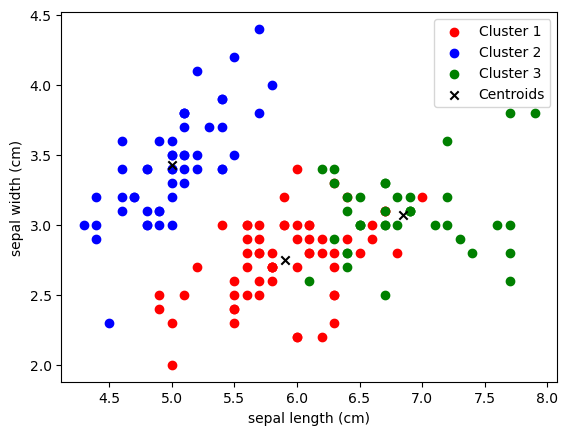

In [38]:
# plot k-means results with centroids and color coded clusters

plt.scatter(X[kmeans_labels == 0, 0], X[kmeans_labels == 0, 1], color='red', label='Cluster 1')
plt.scatter(X[kmeans_labels == 1, 0], X[kmeans_labels == 1, 1], color='blue', label='Cluster 2')
plt.scatter(X[kmeans_labels == 2, 0], X[kmeans_labels == 2, 1], color='green', label='Cluster 3')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], color='black', marker='x', label='Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

In [39]:
# Compare results from self-made k-means and sklearn's k-means


np.allclose(k_means(X, k=3)[0], kmeans.cluster_centers_)

np.allclose(k_means(X, k=3)[1], kmeans.labels_)



True

In [40]:
# Initialize centroid

init_cent = initialize_centroids(X[:,[0,1]], k=2)[:,[0,1]]

init_cent

array([[6.1, 2.8],
       [5.7, 3.8]])

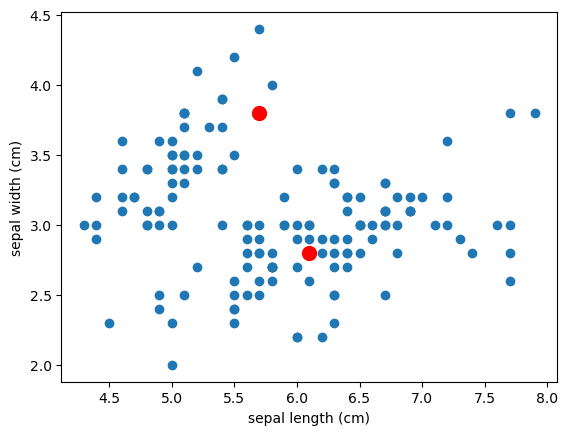

In [41]:
# create scatter plot of X with column 1 on x-axis and column 2 on y-axis

# add init_cent to the plot and color them differently and make them larger than the normal points

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(init_cent[:, 0], init_cent[:, 1], s=100, c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [42]:
comp_dist = compute_distances(X[:,[0,1]], init_cent)

comp_dist = pd.DataFrame(comp_dist, columns=['centroid_1', 'centroid_2'])

KeyError: (0, 0)

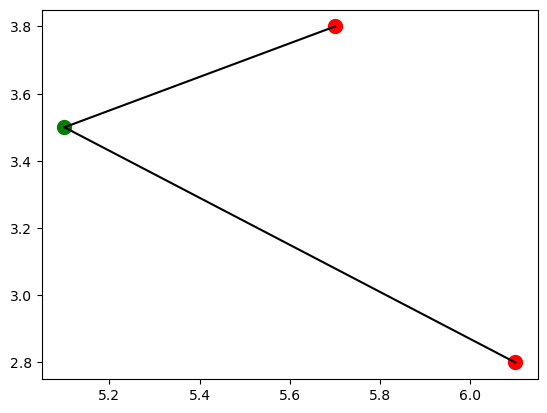

In [43]:




# move the text up so its not on the line itself

plt.scatter(init_cent[:, 0], init_cent[:, 1], s=100, c='red')
plt.scatter(X[0, 0], X[0, 1], s=100, c='green')
plt.plot([init_cent[0, 0], X[0, 0]], [init_cent[0, 1], X[0, 1]], c='black')
plt.plot([init_cent[1, 0], X[0, 0]], [init_cent[1, 1], X[0, 1]], c='black')
plt.text((init_cent[0, 0] + X[0, 0]) / 2, (init_cent[0, 1] + X[0, 1]) / 2 + 0.05, f'{comp_dist[0,0]:.2f}', c='black')
plt.text((init_cent[1, 0] + X[0, 0]) / 2, (init_cent[1, 1] + X[0, 1]) / 2 + 0.1, f'{comp_dist[0,1]:.2f}', c='black')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(['Centroids','Data Point 1'])
plt.show()

In [ ]:
cluster = assign_clusters(comp_dist)

# merge cluster and comp_dist into one dataframe

comp_dist['cluster'] = cluster

comp_dist

,centroid_1,centroid_2,cluster
0,1.220656,0.670820,1
1,1.216553,1.131371,1
2,1.456022,1.166190,1
3,1.529706,1.303840,1
4,1.360147,0.728011,1
...,...,...,...
145,0.632456,1.280625,0
146,0.360555,1.431782,0
147,0.447214,1.131371,0
148,0.608276,0.640312,0


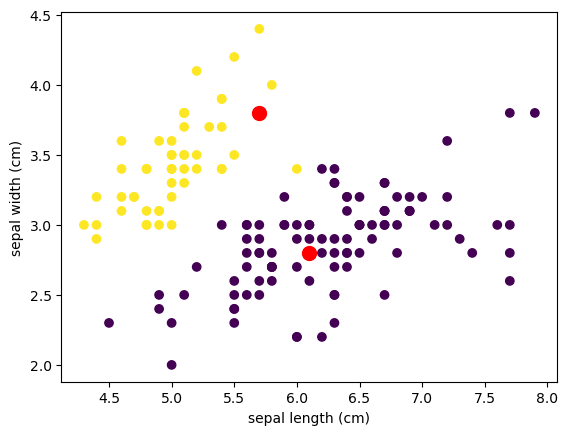

In [ ]:
# plot the data points and the centroids, color the data points according to the cluster they belong to

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.scatter(init_cent[:, 0], init_cent[:, 1], s=100, c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


In [ ]:
update_centroids(X[:,[0,1]], cluster, k=2)

array([[6.247, 2.861],
       [5.036, 3.45 ]])

In [ ]:
# Plot the data points and the updated centroids

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.scatter(update_centroids(X[:,[0,1,2]], cluster, k=3)[:, 0], update_centroids(X[:,[0,1]], cluster, k=2)[:, 1], s=100, c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

NameError: name 'cluster' is not defined

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

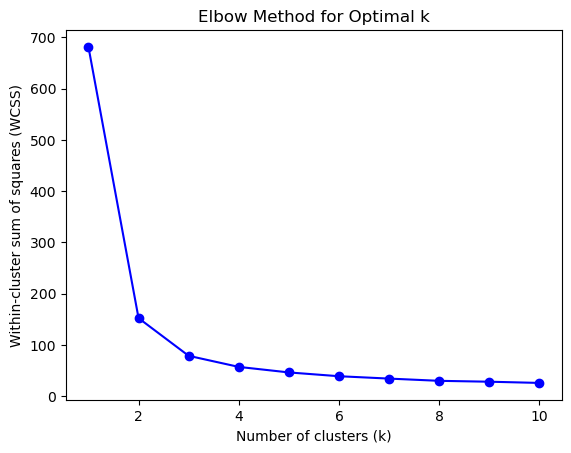

In [ ]:
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11)  # Silhouette score is not defined for k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

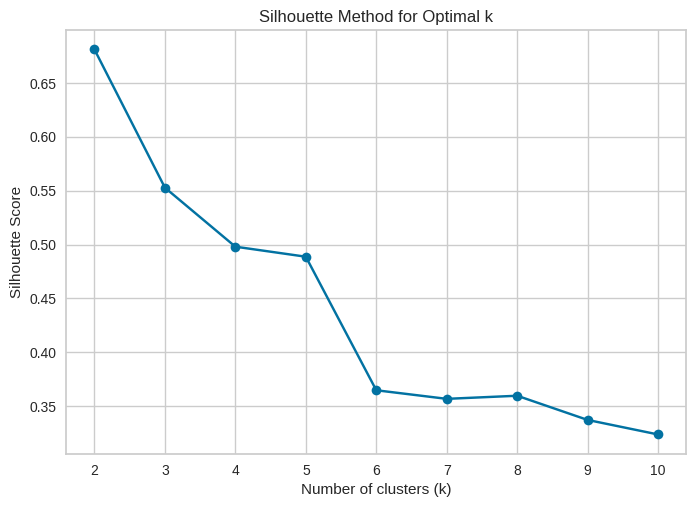

In [ ]:
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


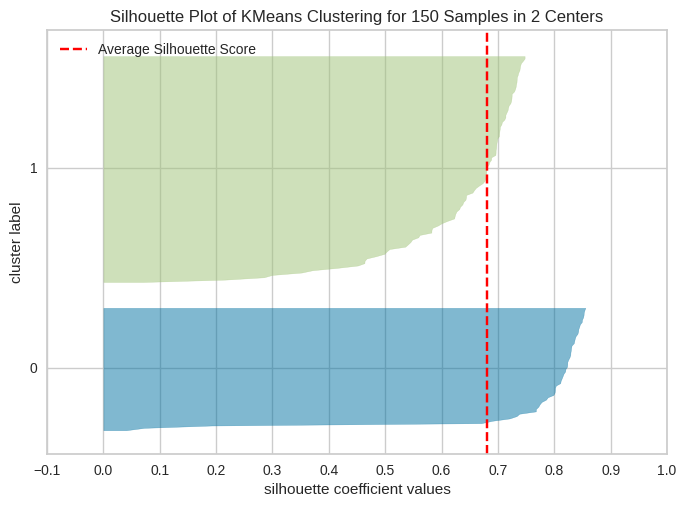

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(n_clusters=2, random_state=0)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


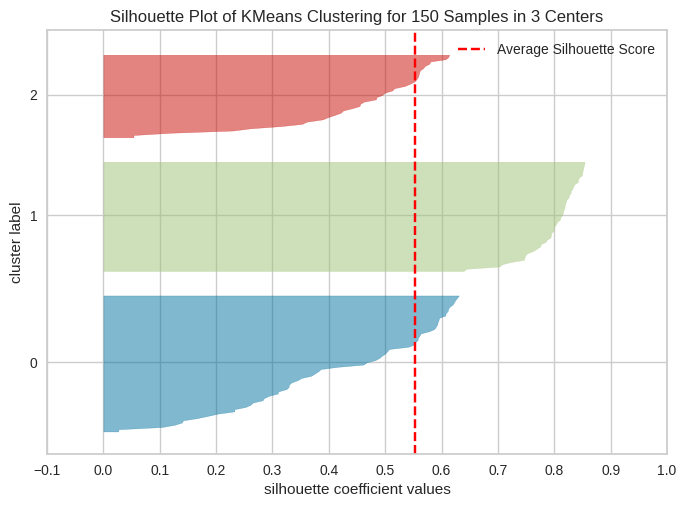

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(n_clusters=3, random_state=0)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

_todo: Use the Yogurt dataset from HW3 to estimate a latent-class MNL model.  This model was formally introduced in the paper by Kamakura & Russell (1989), which you may want to read or reference. Compare the results to the standard (aggregate) MNL model from HW3.  What are the differences in the parameter estimates?_

In [78]:
yogurt = pd.read_csv('yogurt_data.csv')



In [79]:
yogurt['yogurt_type'] = yogurt[['y1', 'y2', 'y3', 'y4']].idxmax(axis=1).str[1].astype(int)


In [53]:
yogurt.head()

,id,y1,y2,y3,y4,f1,f2,f3,f4,p1,p2,p3,p4,yogurt_type
0,1,0,0,0,1,0,0,0,0,0.108,0.081,0.061,0.079,4
1,2,0,1,0,0,0,0,0,0,0.108,0.098,0.064,0.075,2
2,3,0,1,0,0,0,0,0,0,0.108,0.098,0.061,0.086,2
3,4,0,1,0,0,0,0,0,0,0.108,0.098,0.061,0.086,2
4,5,0,1,0,0,0,0,0,0,0.125,0.098,0.049,0.079,2


In [63]:
y1 = yogurt['y1'].sum()
y2 = yogurt['y2'].sum()
y3 = yogurt['y3'].sum()
y4 = yogurt['y4'].sum()

y1_share = y1 / (y1 + y2 + y3 + y4)
y2_share = y2 / (y1 + y2 + y3 + y4)
y3_share = y3 / (y1 + y2 + y3 + y4)
y4_share = y4 / (y1 + y2 + y3 + y4)

y1_share, y2_share, y3_share, y4_share

(0.3419753086419753,
 0.4012345679012346,
 0.029218106995884775,
 0.22757201646090536)

In [81]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr


pandas2ri.activate()

# Load poLCA package
base = importr('base')
utils = importr('utils')
poLCA = importr('poLCA')
# Convert the pandas DataFrame to an R data.frame
r_df = pandas2ri.py2rpy(yogurt)

model_formula = ro.Formula('cbind(f1, f2, f3, f4, p1, p2, p3, p4) ~ 1')

# Run poLCA with 2 latent classes
n_classes = 2
poLCA_result = poLCA.poLCA(model_formula, r_df, nclass=n_classes)

poLCA_result_py = ro.conversion.rpy2py(poLCA_result)

class_coefficients = poLCA_result_py.rx2('coeff')

class_coefficients


 ALERT: some manifest variables contain values that are not
    positive integers. For poLCA to run, please recode categorical
    outcome variables to increment from 1 to the maximum number of
    outcome categories for each variable. 



<rpy2.rinterface_lib.sexp.NULLType object at 0x7f4a4b0cc7d0> [0]

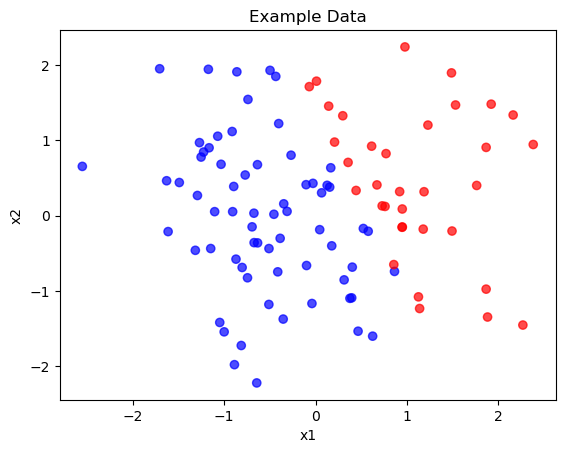

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Create some example data
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] + 0.5 * X[:, 1] > 0.5).astype(int)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Example Data')
plt.show()

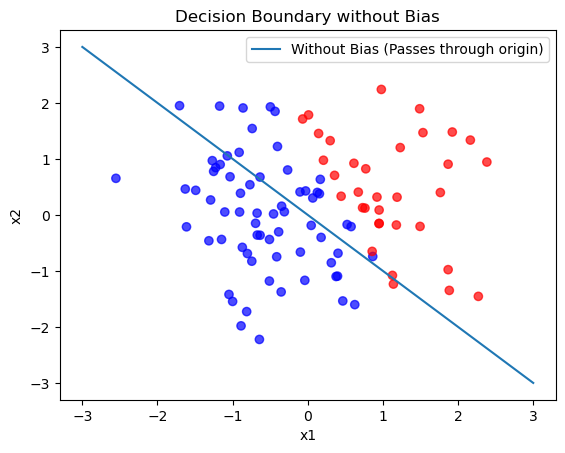

In [84]:
# Linear classifier without bias
w = np.array([1, 1])
b = 0

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
# Plot decision boundary
x1 = np.linspace(-3, 3, 100)
x2 = -w[0] / w[1] * x1
plt.plot(x1, x2, label='Without Bias (Passes through origin)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Decision Boundary without Bias')
plt.show()

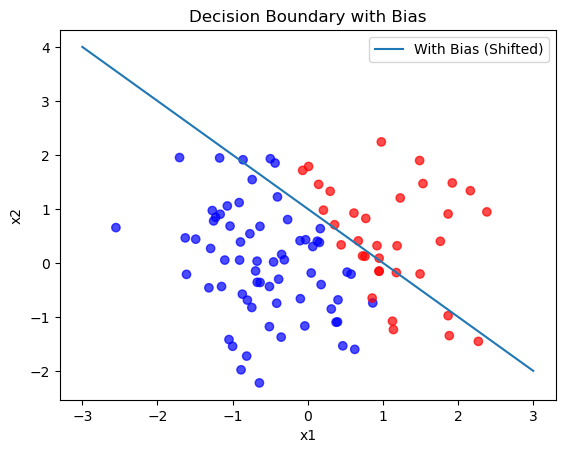

In [85]:
# Linear classifier with bias
w = np.array([1, 1])
b = -1

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
# Plot decision boundary
x1 = np.linspace(-3, 3, 100)
x2 = -w[0] / w[1] * x1 - b / w[1]
plt.plot(x1, x2, label='With Bias (Shifted)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Decision Boundary with Bias')
plt.show()
